# Fifth Activity (IC2)

**Professor: Ricardo Prudêncio**

Task:

(PT-BR)
1. Recomendação de leitura: páginas 154 e 162 do livro do Molnar, para discutir na aula do dia 11 de setembro.

2. Usando os algoritmos kNN, Random Forest e Decision Trees, construa um modelo de classificação para o conjunto Statlog Heart e compute PFI para um conjunto de teste. 

3. Escolha um dos modelos dos passo 2. Agora crie um gráfico PFI para cada gênero. Separe o conjunto de exemplos de teste por gênero e então executar o PFI uma vez para cada subconjunto de teste separado. Verificar as diferenças entre as variáveis consideradas importantes para cada gênero.

(EN)
1. Reading recommendation: pages 154 and 162 of Molnar's book, to discuss in the class on September 11th.

2. Using the kNN, Random Forest, and Decision Trees algorithms, build a classification model for the Statlog Heart dataset and compute PFI for a test set.

3. Choose one of the models from step 2. Now create a PFI plot for each gender. Separate the set of test examples by gender and then run the PFI once for each separate test subset. Check the differences between the variables considered important for each gender.



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

In [2]:
# Load the data
data = pd.read_csv('heart.dat', sep='\s+', header=None)

In [3]:
column_names = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'serum_cholestoral', 'fasting_blood_sugar',
                'resting_ecg_results', 'max_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak', 'slope',
                'num_major_vessels', 'thal', 'target']
data.columns = column_names

In [4]:
data

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_ecg_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,num_major_vessels,thal,target
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


#### First Step

In [5]:
# Separate features and target
X = data.drop('target', axis=1)
y = data['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

# Build and evaluate models
models = {
    'kNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {'model': model, 'accuracy': accuracy}
    print(f"{name} Accuracy: {accuracy:.4f}")

kNN Accuracy: 0.8148
Random Forest Accuracy: 0.7593
Decision Tree Accuracy: 0.6852


There is an often discussed topic regarding permutation-based feature importance: "Should we use a Directional or a Magnitude-based approach to plot de features?". Their differences lie in how they handle the sign of the importance values. 

The directional approach preserves the sign, showing whether permuting a feature hurts (positive values) or unexpectedly helps (negative values) the model's performance. This can reveal potential issues like overfitting but may be more complex to interpret. 

The magnitude-based approach, on the other hand, ignores the sign and focuses solely on the absolute value of the impact. This provides a simpler ranking of features based on their overall influence on the model, regardless of whether that influence is positive or negative. While easier to interpret for feature selection, the magnitude-based approach may hide some nuances about how each feature affects the model's performance.

For this activity, we're plotting both manners:

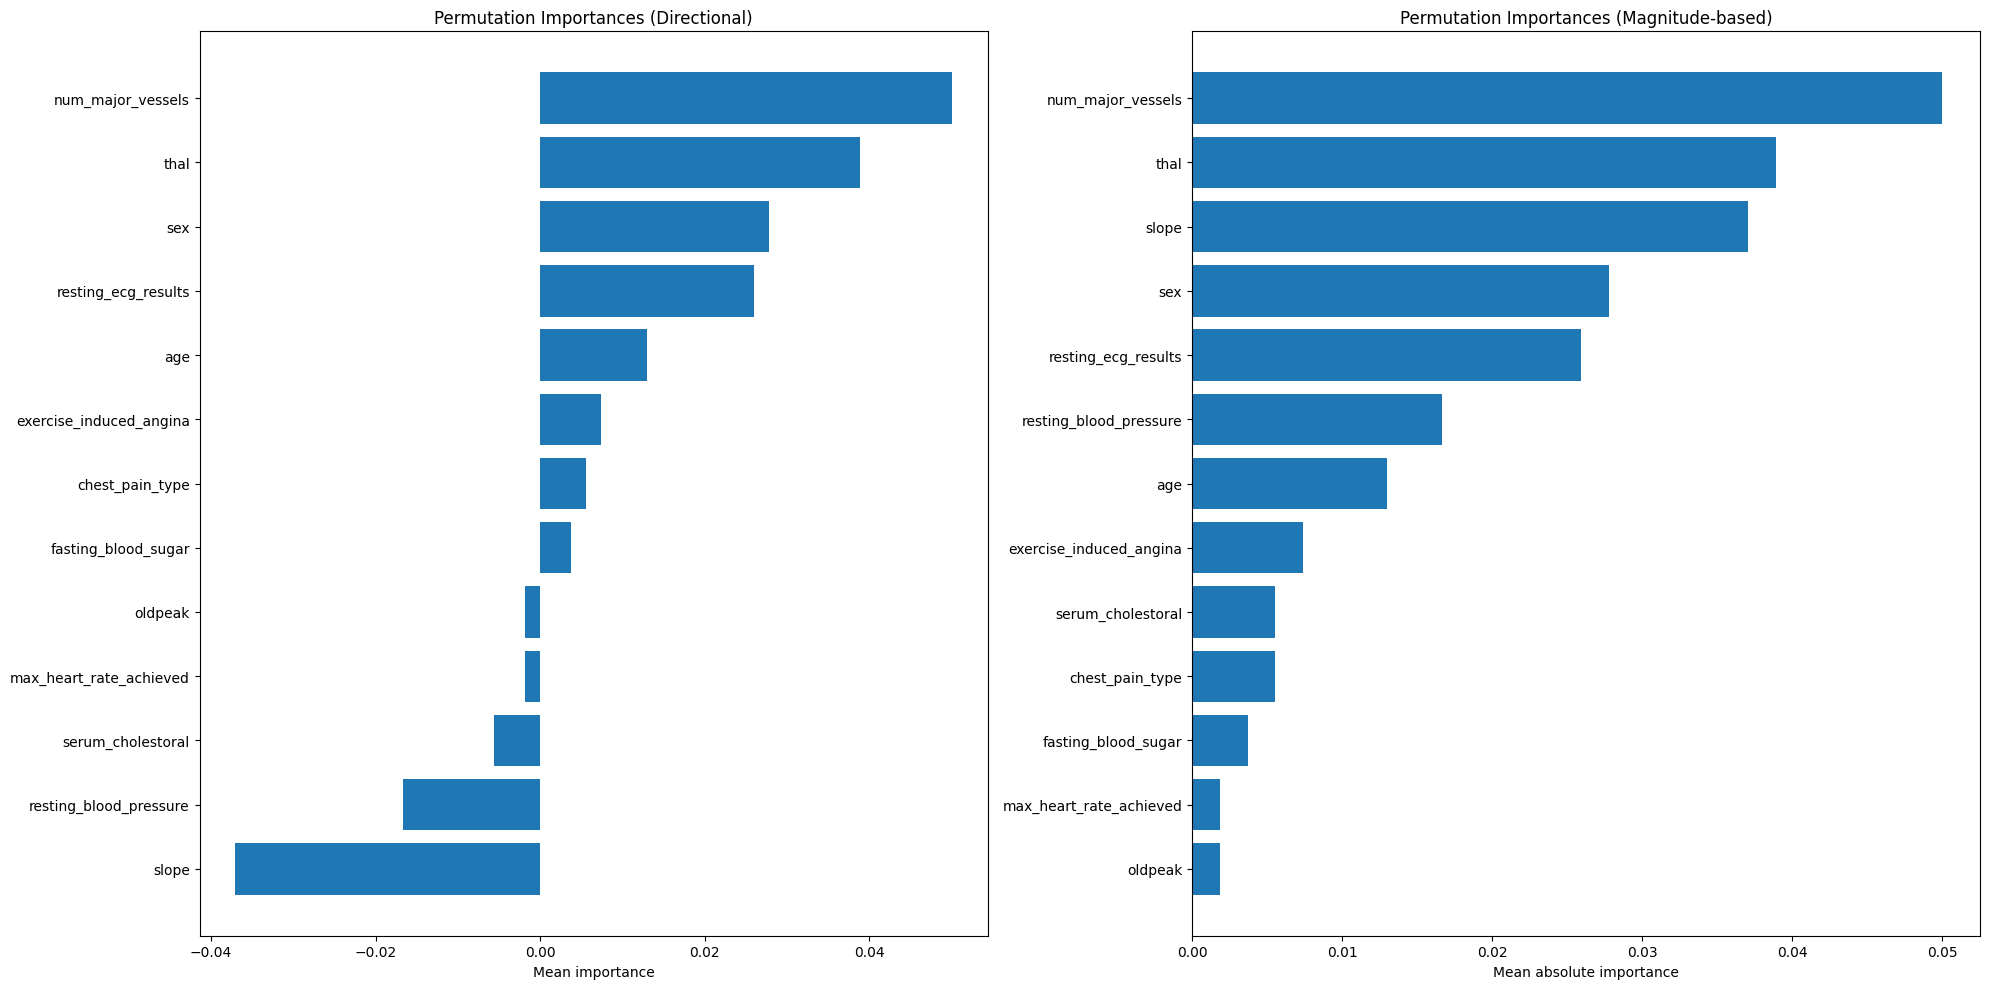

Feature Importances (Directional):
                    feature  importance
0                     slope   -0.037037
1    resting_blood_pressure   -0.016667
2         serum_cholestoral   -0.005556
3   max_heart_rate_achieved   -0.001852
4                   oldpeak   -0.001852
5       fasting_blood_sugar    0.003704
6           chest_pain_type    0.005556
7   exercise_induced_angina    0.007407
8                       age    0.012963
9       resting_ecg_results    0.025926
10                      sex    0.027778
11                     thal    0.038889
12        num_major_vessels    0.050000

Feature Importances (Magnitude-based):
                    feature  importance
0                   oldpeak    0.001852
1   max_heart_rate_achieved    0.001852
2       fasting_blood_sugar    0.003704
3           chest_pain_type    0.005556
4         serum_cholestoral    0.005556
5   exercise_induced_angina    0.007407
6                       age    0.012963
7    resting_blood_pressure    0.016667
8    

In [6]:
# Compute PFI for the test set
chosen_model = 'kNN'
model = results[chosen_model]['model']

result = permutation_importance(model, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot 1: Directional Importance
sorted_idx = result.importances_mean.argsort()
ax1.barh(X_test.columns[sorted_idx], result.importances_mean[sorted_idx])
ax1.set_title("Permutation Importances (Directional)")
ax1.set_xlabel("Mean importance")

# Plot 2: Magnitude-based Importance
magnitude_sorted_idx = np.abs(result.importances_mean).argsort()
ax2.barh(X_test.columns[magnitude_sorted_idx], np.abs(result.importances_mean[magnitude_sorted_idx]))
ax2.set_title("Permutation Importances (Magnitude-based)")
ax2.set_xlabel("Mean absolute importance")

plt.tight_layout()
plt.show()

# Create and print DataFrames for both approaches
directional_df = pd.DataFrame({
    'feature': X_test.columns[sorted_idx],
    'importance': result.importances_mean[sorted_idx]
}).sort_values('importance', ascending=True)

magnitude_df = pd.DataFrame({
    'feature': X_test.columns[magnitude_sorted_idx],
    'importance': np.abs(result.importances_mean[magnitude_sorted_idx])
}).sort_values('importance', ascending=True)

print("Feature Importances (Directional):")
print(directional_df)

print("\nFeature Importances (Magnitude-based):")
print(magnitude_df)

Negative values for permutation importance indicate that the predictions on the shuffled (or noisy) data are more accurate than the real data. This means that the feature does not contribute much to predictions (importance close to 0), but random chance caused the predictions on shuffled data to be more accurate.

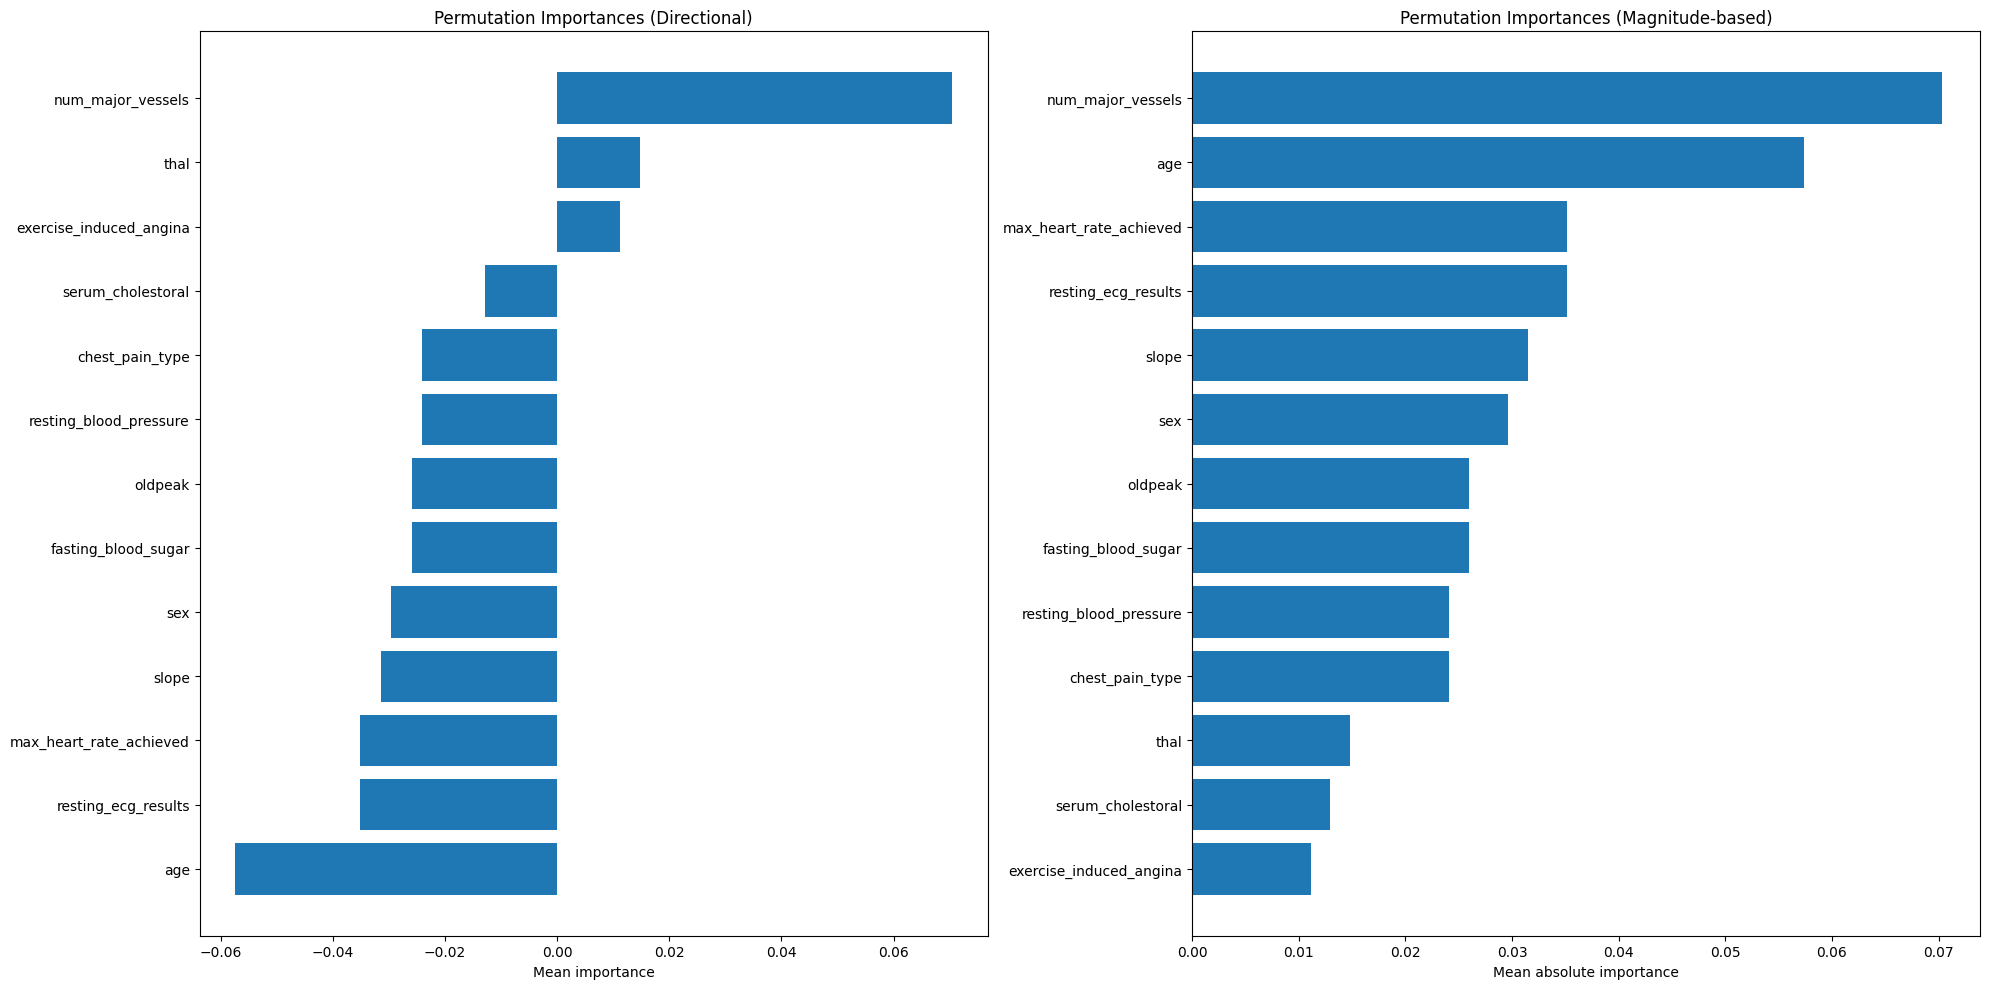

Feature Importances (Directional):
                    feature  importance
0                       age   -0.057407
1       resting_ecg_results   -0.035185
2   max_heart_rate_achieved   -0.035185
3                     slope   -0.031481
4                       sex   -0.029630
5       fasting_blood_sugar   -0.025926
6                   oldpeak   -0.025926
7    resting_blood_pressure   -0.024074
8           chest_pain_type   -0.024074
9         serum_cholestoral   -0.012963
10  exercise_induced_angina    0.011111
11                     thal    0.014815
12        num_major_vessels    0.070370

Feature Importances (Magnitude-based):
                    feature  importance
0   exercise_induced_angina    0.011111
1         serum_cholestoral    0.012963
2                      thal    0.014815
3           chest_pain_type    0.024074
4    resting_blood_pressure    0.024074
5       fasting_blood_sugar    0.025926
6                   oldpeak    0.025926
7                       sex    0.029630
8    

In [7]:
# Compute PFI for the test set
chosen_model = 'Random Forest'
model = results[chosen_model]['model']

result = permutation_importance(model, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot 1: Directional Importance
sorted_idx = result.importances_mean.argsort()
ax1.barh(X_test.columns[sorted_idx], result.importances_mean[sorted_idx])
ax1.set_title("Permutation Importances (Directional)")
ax1.set_xlabel("Mean importance")

# Plot 2: Magnitude-based Importance
magnitude_sorted_idx = np.abs(result.importances_mean).argsort()
ax2.barh(X_test.columns[magnitude_sorted_idx], np.abs(result.importances_mean[magnitude_sorted_idx]))
ax2.set_title("Permutation Importances (Magnitude-based)")
ax2.set_xlabel("Mean absolute importance")

plt.tight_layout()
plt.show()

# Create and print DataFrames for both approaches
directional_df = pd.DataFrame({
    'feature': X_test.columns[sorted_idx],
    'importance': result.importances_mean[sorted_idx]
}).sort_values('importance', ascending=True)

magnitude_df = pd.DataFrame({
    'feature': X_test.columns[magnitude_sorted_idx],
    'importance': np.abs(result.importances_mean[magnitude_sorted_idx])
}).sort_values('importance', ascending=True)

print("Feature Importances (Directional):")
print(directional_df)

print("\nFeature Importances (Magnitude-based):")
print(magnitude_df)

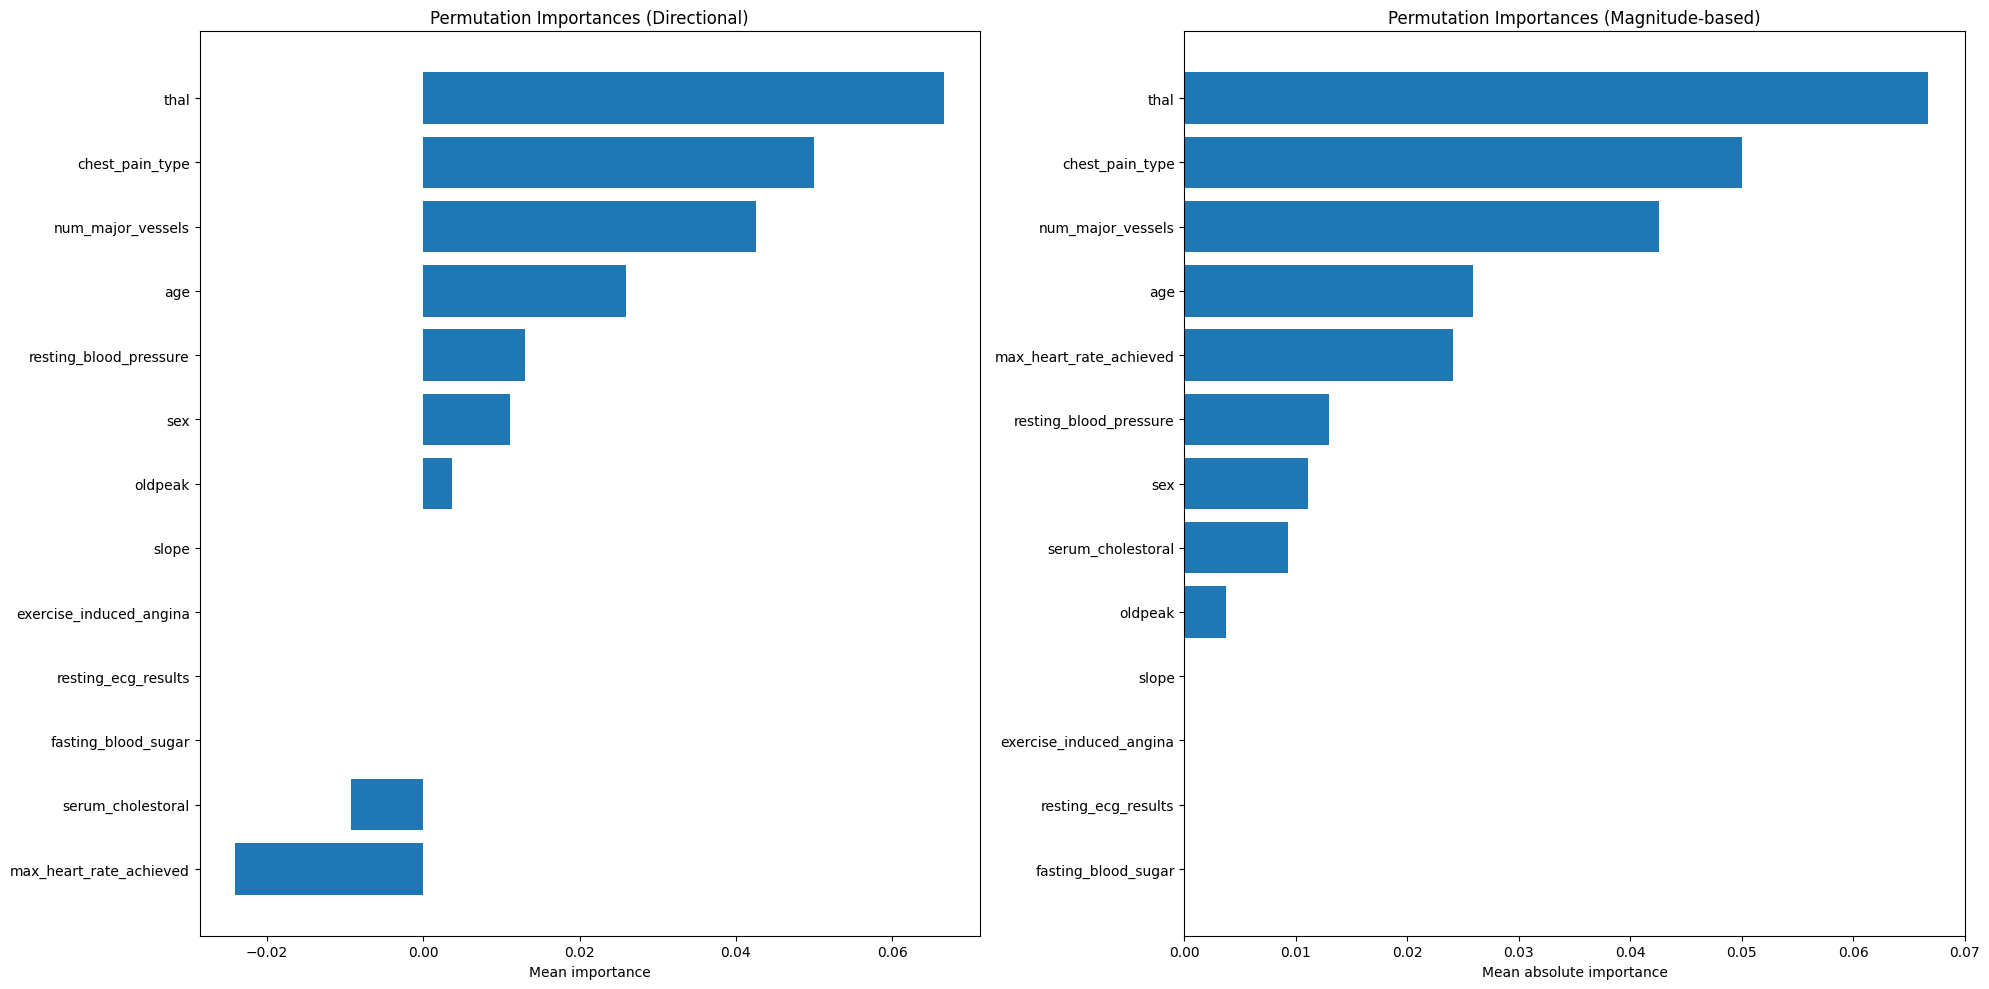

Feature Importances (Directional):
                    feature  importance
0   max_heart_rate_achieved   -0.024074
1         serum_cholestoral   -0.009259
2       fasting_blood_sugar    0.000000
3       resting_ecg_results    0.000000
4   exercise_induced_angina    0.000000
5                     slope    0.000000
6                   oldpeak    0.003704
7                       sex    0.011111
8    resting_blood_pressure    0.012963
9                       age    0.025926
10        num_major_vessels    0.042593
11          chest_pain_type    0.050000
12                     thal    0.066667

Feature Importances (Magnitude-based):
                    feature  importance
0       fasting_blood_sugar    0.000000
1       resting_ecg_results    0.000000
2   exercise_induced_angina    0.000000
3                     slope    0.000000
4                   oldpeak    0.003704
5         serum_cholestoral    0.009259
6                       sex    0.011111
7    resting_blood_pressure    0.012963
8   m

In [8]:
# Compute PFI for the test set
chosen_model = 'Decision Tree'
model = results[chosen_model]['model']

result = permutation_importance(model, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot 1: Directional Importance
sorted_idx = result.importances_mean.argsort()
ax1.barh(X_test.columns[sorted_idx], result.importances_mean[sorted_idx])
ax1.set_title("Permutation Importances (Directional)")
ax1.set_xlabel("Mean importance")

# Plot 2: Magnitude-based Importance
magnitude_sorted_idx = np.abs(result.importances_mean).argsort()
ax2.barh(X_test.columns[magnitude_sorted_idx], np.abs(result.importances_mean[magnitude_sorted_idx]))
ax2.set_title("Permutation Importances (Magnitude-based)")
ax2.set_xlabel("Mean absolute importance")

plt.tight_layout()
plt.show()

# Create and print DataFrames for both approaches
directional_df = pd.DataFrame({
    'feature': X_test.columns[sorted_idx],
    'importance': result.importances_mean[sorted_idx]
}).sort_values('importance', ascending=True)

magnitude_df = pd.DataFrame({
    'feature': X_test.columns[magnitude_sorted_idx],
    'importance': np.abs(result.importances_mean[magnitude_sorted_idx])
}).sort_values('importance', ascending=True)

print("Feature Importances (Directional):")
print(directional_df)

print("\nFeature Importances (Magnitude-based):")
print(magnitude_df)

#### Second Step

For this Step, we chose the *Random Forest* Model.

For simplicity, we are doing our analysis consideing both Magnitude-based and Directional-based approaches (considering the same points we raised before).

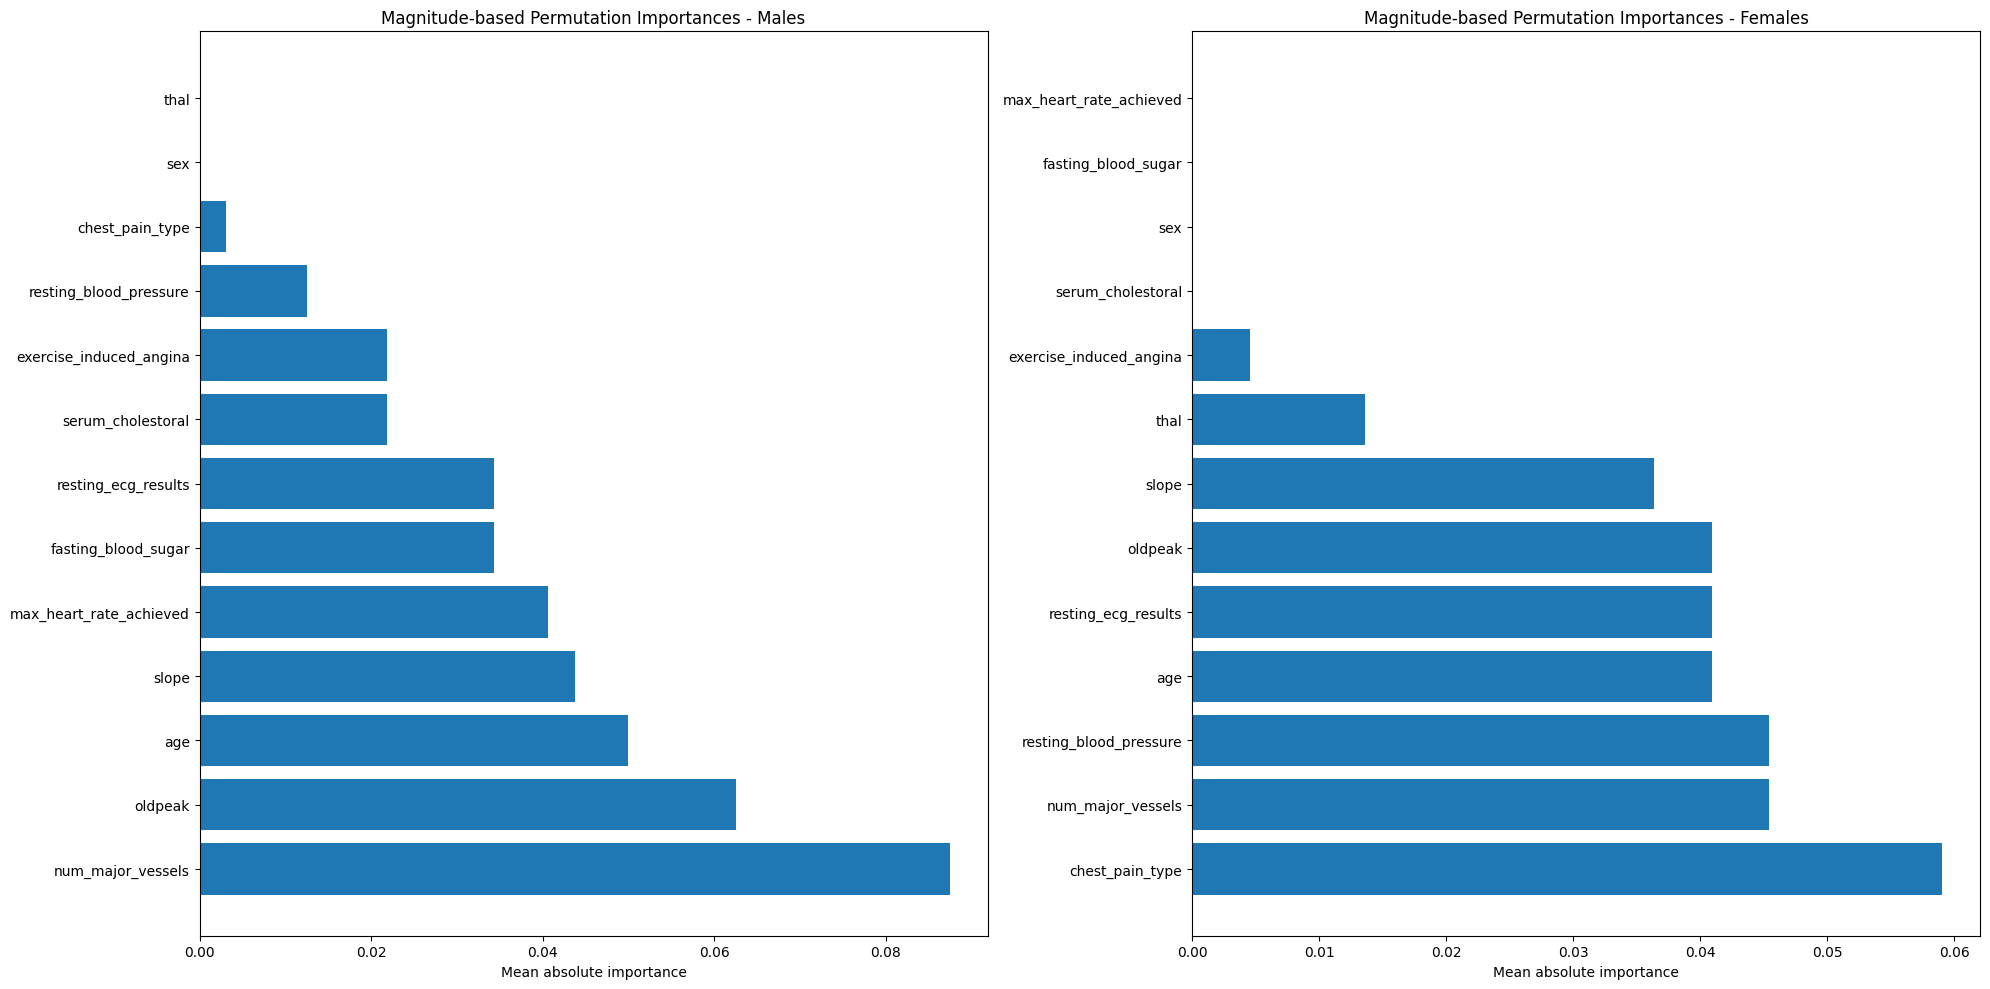

Magnitude-based Feature Importances for Males:
                    feature  importance
11        num_major_vessels    0.087500
9                   oldpeak    0.062500
0                       age    0.050000
10                    slope    0.043750
7   max_heart_rate_achieved    0.040625
5       fasting_blood_sugar    0.034375
6       resting_ecg_results    0.034375
4         serum_cholestoral    0.021875
8   exercise_induced_angina    0.021875
3    resting_blood_pressure    0.012500
2           chest_pain_type    0.003125
1                       sex    0.000000
12                     thal    0.000000

Magnitude-based Feature Importances for Females:
                    feature    importance
2           chest_pain_type  5.909091e-02
11        num_major_vessels  4.545455e-02
3    resting_blood_pressure  4.545455e-02
0                       age  4.090909e-02
6       resting_ecg_results  4.090909e-02
9                   oldpeak  4.090909e-02
10                    slope  3.636364e-02
12     

In [9]:
chosen_model = 'Random Forest'
model = results[chosen_model]['model']

# Separate test set by gender
male_mask = X_test['sex'] == 1
female_mask = X_test['sex'] == 0

X_test_male = X_test_scaled[male_mask]
X_test_female = X_test_scaled[female_mask]
y_test_male = y_test[male_mask]
y_test_female = y_test[female_mask]

# Function to compute magnitude-based PFI
def compute_pfi_absolute(X, y):
    result = permutation_importance(model, X, y, n_repeats=10, random_state=42)
    return pd.DataFrame({
        'feature': X.columns,
        'importance': np.abs(result.importances_mean)  # Using absolute value here
    }).sort_values('importance', ascending=False)

# Compute PFI for both genders
male_importance = compute_pfi_absolute(X_test_male, y_test_male)
female_importance = compute_pfi_absolute(X_test_female, y_test_female)

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot for males
ax1.barh(male_importance['feature'], male_importance['importance'])
ax1.set_title("Magnitude-based Permutation Importances - Males")
ax1.set_xlabel("Mean absolute importance")

# Plot for females
ax2.barh(female_importance['feature'], female_importance['importance'])
ax2.set_title("Magnitude-based Permutation Importances - Females")
ax2.set_xlabel("Mean absolute importance")

plt.tight_layout()
plt.show()

# Print importance values
print("Magnitude-based Feature Importances for Males:")
print(male_importance)

print("\nMagnitude-based Feature Importances for Females:")
print(female_importance)

# Compare top 5 important features for each gender
print("\nTop 5 important features for Males:")
print(male_importance.head())

print("\nTop 5 important features for Females:")
print(female_importance.head())

# Find differences in feature rankings
male_ranks = male_importance.reset_index().set_index('feature')
female_ranks = female_importance.reset_index().set_index('feature')
rank_diff = abs(male_ranks['index'] - female_ranks['index']).sort_values(ascending=False)

print("\nFeatures with the largest difference in importance ranking between genders:")
print(rank_diff.head())

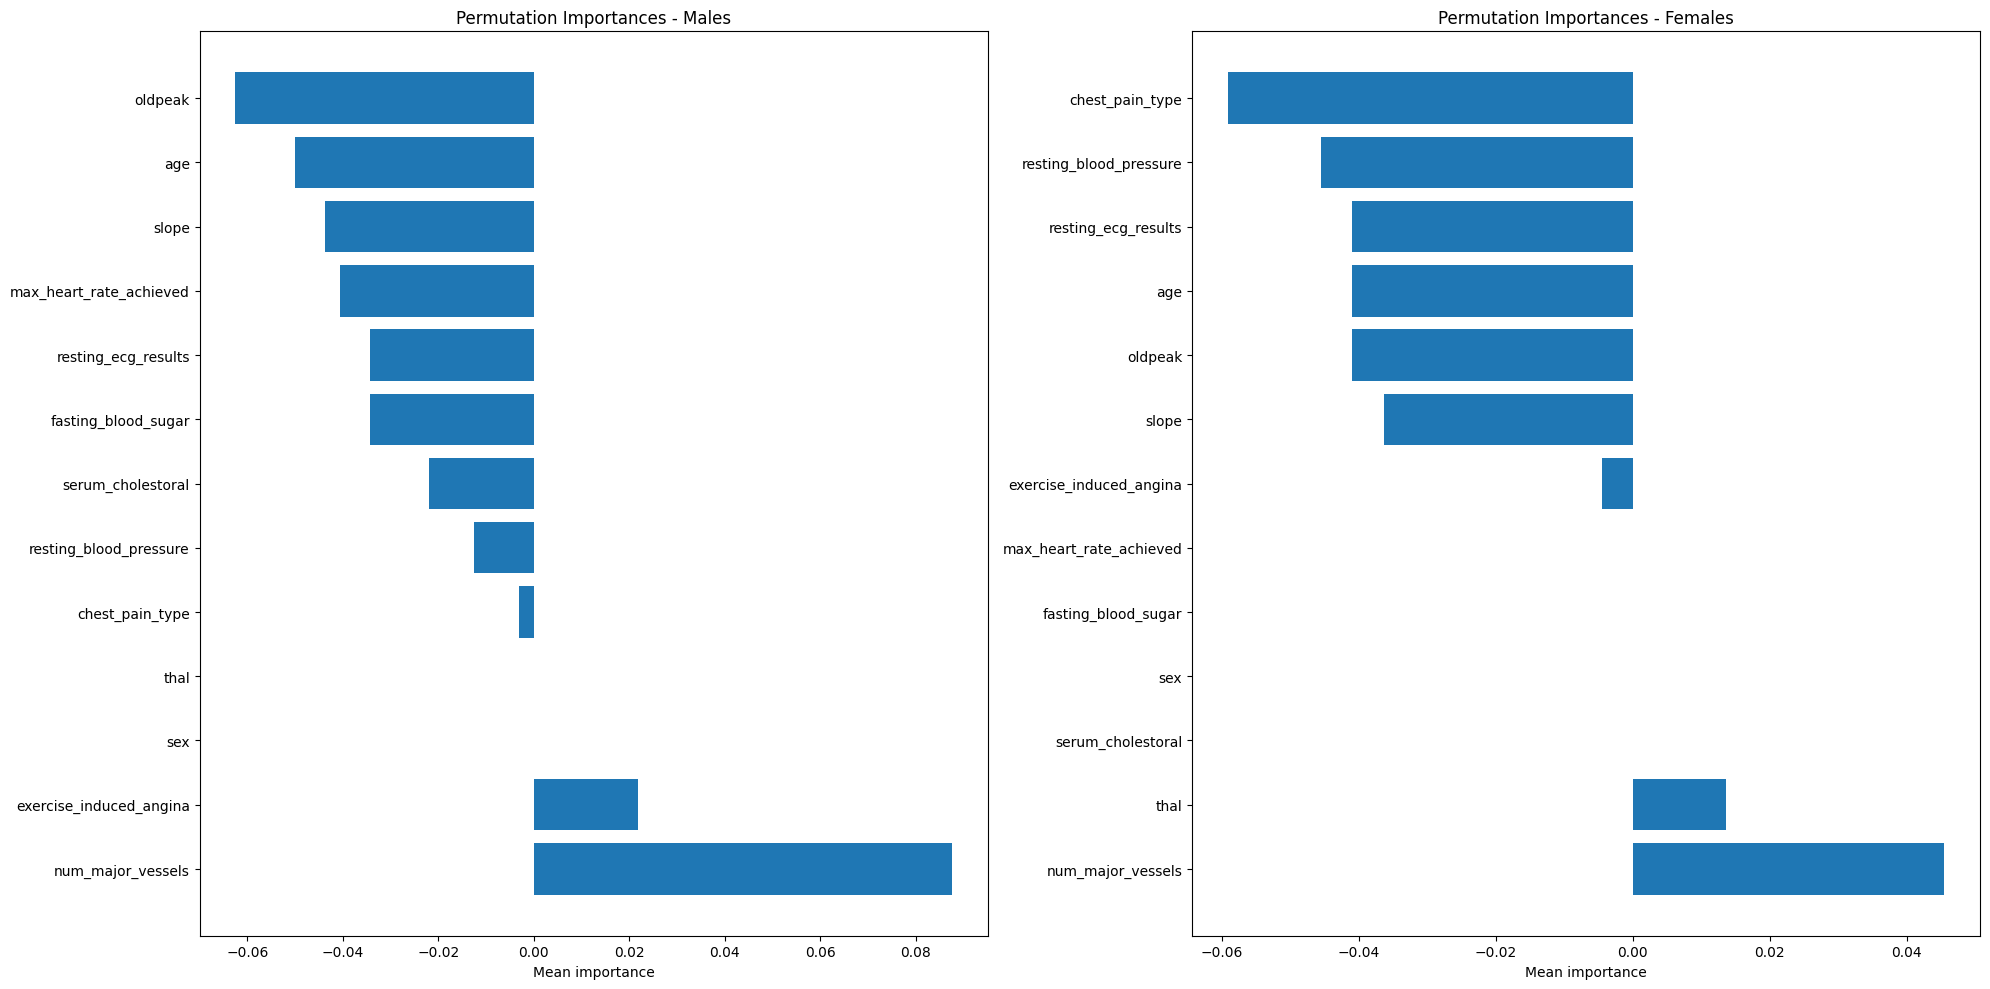

Feature Importances for Males:
                    feature  importance
11        num_major_vessels    0.087500
8   exercise_induced_angina    0.021875
1                       sex    0.000000
12                     thal    0.000000
2           chest_pain_type   -0.003125
3    resting_blood_pressure   -0.012500
4         serum_cholestoral   -0.021875
5       fasting_blood_sugar   -0.034375
6       resting_ecg_results   -0.034375
7   max_heart_rate_achieved   -0.040625
10                    slope   -0.043750
0                       age   -0.050000
9                   oldpeak   -0.062500

Feature Importances for Females:
                    feature    importance
11        num_major_vessels  4.545455e-02
12                     thal  1.363636e-02
4         serum_cholestoral  1.110223e-17
1                       sex  0.000000e+00
5       fasting_blood_sugar  0.000000e+00
7   max_heart_rate_achieved  0.000000e+00
8   exercise_induced_angina -4.545455e-03
10                    slope -3.636364e-

In [10]:
# Function to compute direction-based PFI 
def compute_pfi_directional(X, y):
    result = permutation_importance(model, X, y, n_repeats=10, random_state=42)
    return pd.DataFrame({
        'feature': X.columns,
        'importance': result.importances_mean
    }).sort_values('importance', ascending=False)

# Compute PFI for both genders
male_importance = compute_pfi_directional(X_test_male, y_test_male)
female_importance = compute_pfi_directional(X_test_female, y_test_female)

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot for males
ax1.barh(male_importance['feature'], male_importance['importance'])
ax1.set_title("Permutation Importances - Males")
ax1.set_xlabel("Mean importance")

# Plot for females
ax2.barh(female_importance['feature'], female_importance['importance'])
ax2.set_title("Permutation Importances - Females")
ax2.set_xlabel("Mean importance")

plt.tight_layout()
plt.show()

# Print importance values
print("Feature Importances for Males:")
print(male_importance)

print("\nFeature Importances for Females:")
print(female_importance)

# Compare top 5 important features for each gender
print("\nTop 5 important features for Males:")
print(male_importance.head())

print("\nTop 5 important features for Females:")
print(female_importance.head())

# Find differences in feature rankings
male_ranks = male_importance.reset_index().set_index('feature')
female_ranks = female_importance.reset_index().set_index('feature')
rank_diff = abs(male_ranks['index'] - female_ranks['index']).sort_values(ascending=False)

print("\nFeatures with the largest difference in importance ranking between genders:")
print(rank_diff.head())

##### Individual Outtake:

- chest_pain_type is the most important feature for females but one of the least important for males.
- num_major_vessels and exercise_induced_angina are highly important for males (positive impact), exercise_induced_angina is less so for females.
- age and oldpeak are important for both genders, although they seem slightly more important for males.
- the number of major vessels (num_major_vessels) has a positive impact for both genders, but it's much more pronounced in males.
- the 'sex' feature has little importance for both, which is expected as this importance has the only 1 gender for both PFI.
- the different importance of chest pain types between genders could suggest that pain manifestation or its predictive value varies significantly between males and females.
- the high importance of major vessels count for males might indicate that this is a stronger predictor of heart disease in men.
Blood pressure seems to be a more crucial indicator for women in this model.

Potential Biases:

The dataset might have imbalances in the number of male vs. female patients, which could affect these results.
There might also be underlying biases in how symptoms were reported or recorded for each gender.

As we can see, the first suspicion is confirmed when we do:

In [11]:
# Check the balance of the dataset
print("Original dataset gender distribution:")
print(X['sex'].value_counts(normalize=True))

Original dataset gender distribution:
sex
1.0    0.677778
0.0    0.322222
Name: proportion, dtype: float64


We have 2 times more males than females in the original dataset. Besides, the data itself has very few instances:

In [12]:
print(f'We have {data.shape[0]} instances.')

We have 270 instances.


Because of that, we might need to do a more in-depth analysis with more data to get more solid results.